In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaushil268/disease-prediction-using-machine-learning")

print("Path to dataset files:", path)

/Users/olga/DSI/DiseaseFeatureClassifiers/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/olga/.cache/kagglehub/datasets/kaushil268/disease-prediction-using-machine-learning/versions/1


In [2]:
import os

files = os.listdir(path)
print(files)

['Training.csv', 'Testing.csv']


In [3]:
training_path = os.path.join(path, 'Training.csv')
test_path = os.path.join(path, 'Testing.csv')

In [4]:
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

set_config(transform_output='pandas')

train_data = pd.read_csv(training_path)
test_data = pd.read_csv(test_path)



In [5]:
print(train_data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

In [6]:
print(test_data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

### EDA Train data

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [8]:
train_data['Unnamed: 133'].unique()

array([nan])

In [9]:
missing_values_train = train_data.isnull().sum()
missing_values_train

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [10]:
train_data['prognosis'].describe()

count                 4920
unique                  41
top       Fungal infection
freq                   120
Name: prognosis, dtype: object

In [11]:
column_list = train_data.columns.tolist()
column_list

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [12]:
duplicate_columns_train = train_data.columns[train_data.columns.duplicated()]
print(f'Duplicate column names: {duplicate_columns_train.tolist()}')

Duplicate column names: []


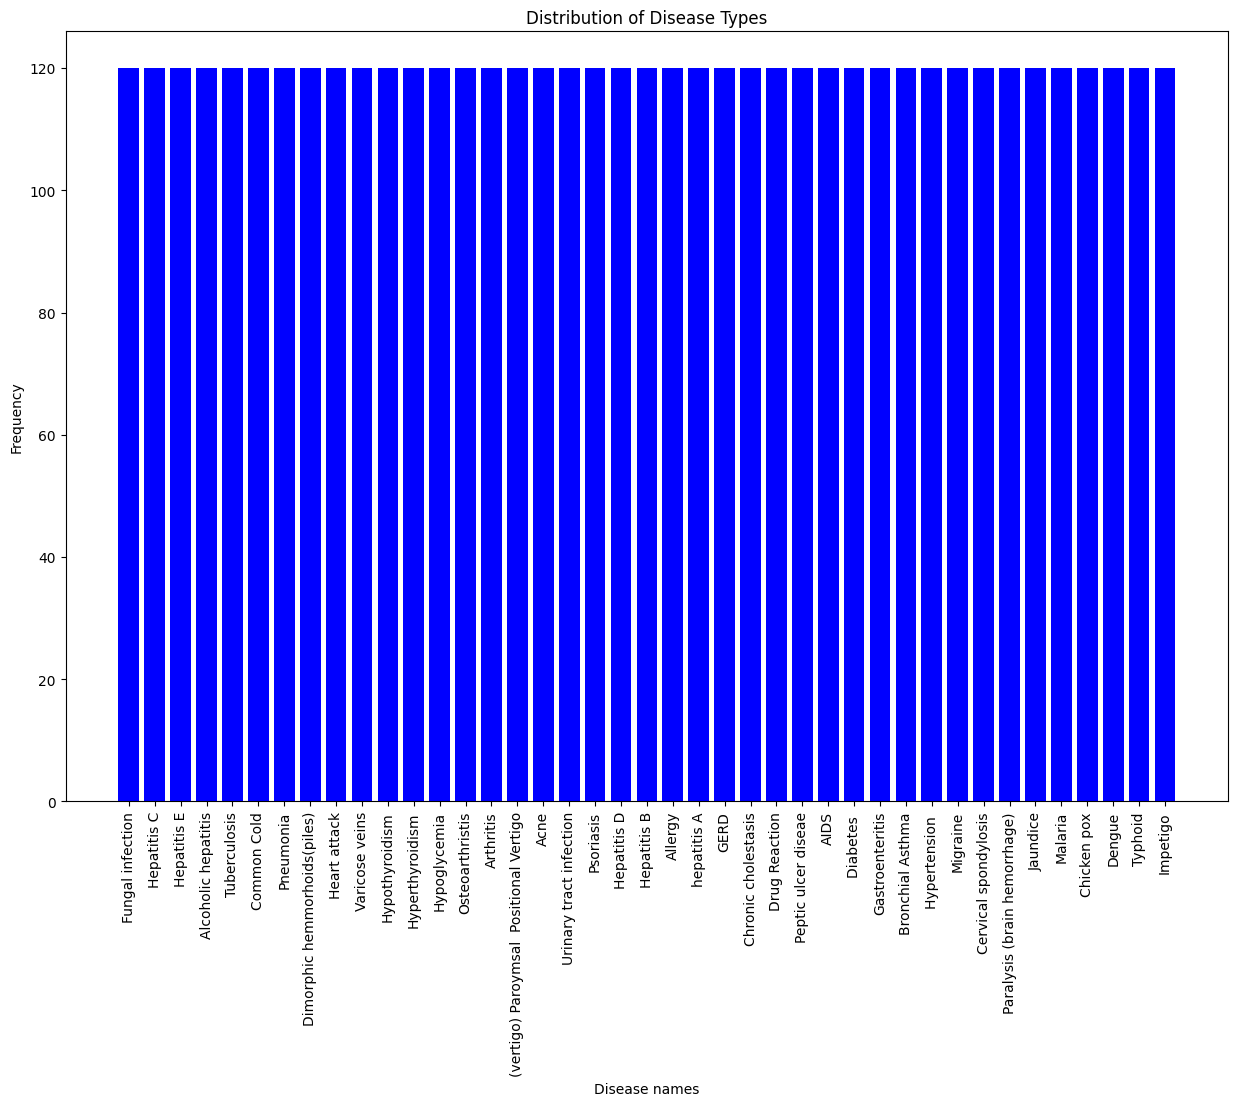

In [13]:
names = train_data['prognosis'].value_counts().keys()
counts = train_data['prognosis'].value_counts().values
plt.subplots(figsize=(15, 10))
plt.bar(names, counts, color='blue')

plt.xlabel('Disease names')
plt.ylabel('Frequency')
plt.title('Distribution of Disease Types')
plt.xticks(rotation=90)
plt.show()

- dataset is balanced, 120 samples

In [14]:
train_data.shape

(4920, 134)

Text(0.5, 1.0, 'Missing Data')

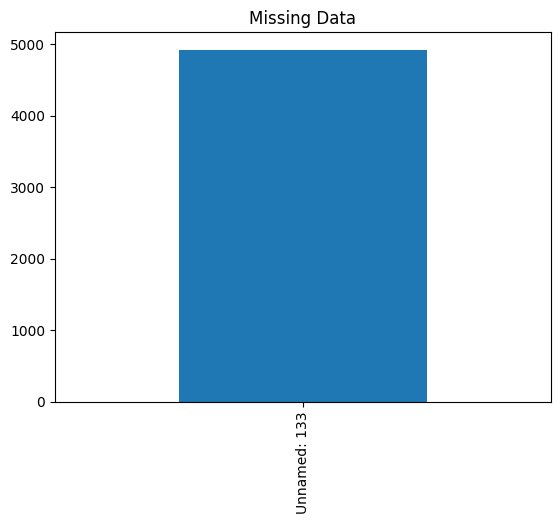

In [15]:
# to show the amount of missing data for each symptom
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing = missing.sort_values(ascending=False)
missing.plot.bar()
plt.title('Missing Data')

In [16]:
train_data.drop(columns=['Unnamed: 133'], inplace=True)

In [17]:
train_data.shape

(4920, 133)

### EDA Test data

In [18]:
test_data.shape

(42, 133)

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [20]:
column_list = test_data.columns.tolist()
column_list

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [21]:
duplicate_columns_test = test_data.columns[test_data.columns.duplicated()]
print(f'Duplicate column names: {duplicate_columns_test.tolist()}')

Duplicate column names: []


In [22]:
test_data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [23]:
test_data['prognosis'].value_counts()

prognosis
Fungal infection                           2
Hepatitis C                                1
Hepatitis E                                1
Alcoholic hepatitis                        1
Tuberculosis                               1
Common Cold                                1
Pneumonia                                  1
Dimorphic hemmorhoids(piles)               1
Heart attack                               1
Varicose veins                             1
Hypothyroidism                             1
Hyperthyroidism                            1
Hypoglycemia                               1
Osteoarthristis                            1
Arthritis                                  1
(vertigo) Paroymsal  Positional Vertigo    1
Acne                                       1
Urinary tract infection                    1
Psoriasis                                  1
Hepatitis D                                1
Hepatitis B                                1
Allergy                                    1


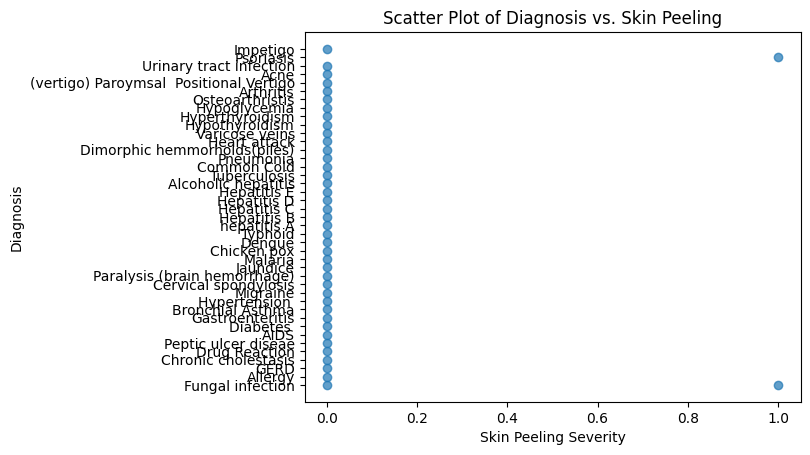

In [24]:
plt.scatter(test_data['skin_peeling'], test_data['prognosis'], alpha=0.7)

plt.xlabel('Skin Peeling Severity')
plt.ylabel('Diagnosis')
plt.title('Scatter Plot of Diagnosis vs. Skin Peeling')
plt.show()

In [25]:
df_test = pd.DataFrame(test_data)

avg_by_diagnosis = df_test.groupby('prognosis').mean()

avg_by_diagnosis.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acne,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alcoholic hepatitis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allergy,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merge two datasets

In [26]:
full_data = pd.concat([train_data, test_data], ignore_index=True)

In [27]:
full_data.shape

(4962, 133)

In [28]:
from sklearn.model_selection import train_test_split

X = full_data.drop(columns=['prognosis'])

y = full_data['prognosis']

y = y.astype('category')
y_encoded = y.cat.codes

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (3969, 132)
Testing set size: (993, 132)


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Create a copy and then group
full_data_copy = full_data.copy()
symptom_profiles = full_data_copy.groupby('prognosis').mean()

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(symptom_profiles)


In [31]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [32]:
# Attach cluster labels
scaled_full_data = pd.DataFrame(scaled_features, columns=symptom_profiles.columns)
scaled_full_data['prognosis'] = symptom_profiles.index
scaled_full_data['cluster'] = clusters

print(scaled_full_data.head())

                                          itching  skin_rash  \
prognosis                                                      
(vertigo) Paroymsal  Positional Vertigo -0.413949  -0.453589   
AIDS                                    -0.413949  -0.453589   
Acne                                    -0.413949   2.243013   
Alcoholic hepatitis                     -0.413949  -0.453589   
Allergy                                 -0.413949  -0.453589   

                                         nodal_skin_eruptions  \
prognosis                                                       
(vertigo) Paroymsal  Positional Vertigo             -0.158114   
AIDS                                                -0.158114   
Acne                                                -0.158114   
Alcoholic hepatitis                                 -0.158114   
Allergy                                             -0.158114   

                                         continuous_sneezing  shivering  \
prognosis           

In [ ]:
cluster_prognosis = scaled_full_data[['prognosis', 'cluster']]

# Print the corresponding 'prognosis' values for that cluster
for i in sorted(cluster_prognosis['cluster'].unique()):
    print(f'\n Cluster: {i}')
    print(cluster_prognosis[cluster_prognosis['cluster'] == i]['prognosis'].tolist())


 Cluster: 0
['Fungal infection']

 Cluster: 1
['Varicose veins']

 Cluster: 2
['Bronchial Asthma', 'Pneumonia', 'Tuberculosis']

 Cluster: 3
['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold', 'Dengue', 'Diabetes ', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Psoriasis', 'Typhoid', 'hepatitis A']

 Cluster: 4
['Urinary tract infection']


Why These Clusters Emerged After Scaling
 - ✅ Cluster 3: The Big Mixed Group
Contains 32 diagnoses with overlapping symptoms across multiple systems: metabolic (diabetes, hypertension), hepatic (hepatitis types), autoimmune (arthritis, psoriasis), neurological (migraine, vertigo), and infectious (malaria, typhoid).
These diseases share broad symptom patterns like *fever*, *fatigue*, *pain*, and *inflammation*.
Scaling equalized symptom influence, allowing KMeans to group them based on shared multi-symptom profiles.
- ✅ Cluster 2: Respiratory Conditions
Bronchial Asthma and Pneumonia both involve *cough*, *chest pain*, *breathlessness*.
Their symptom vectors are similar enough to form a distinct respiratory cluster.
- ✅ Cluster 5: Viral and Airborne Infections
Chicken pox, Dengue, Common Cold, Tuberculosis — all are viral or airborne, often with fever, cough, rash, or malaise.
Their symptom profiles are *more acute* and *contagious in nature*.
- ✅ Cluster 0, 1, 4: Isolated Profiles
Fungal infection (Cluster 0): Unique skin-related symptoms, low overlap with others.
Varicose veins (Cluster 1): Vascular symptoms like leg pain or swelling, not shared widely.
Urinary tract infection (Cluster 4): Specific *urinary symptoms*, distinct from other clusters.

/var/folders/wy/v92nv28111j7vk4ynsyxm2700000gn/T/ipykernel_18429/3090373786.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_clusters))


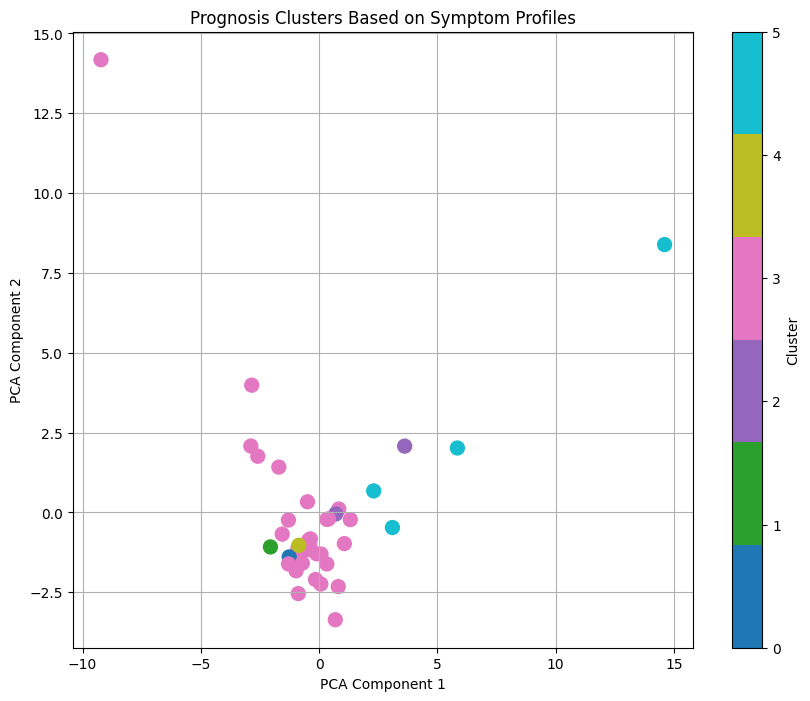

In [ ]:
# plot clusters 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to standardized symptom profiles (excluding the cluster column)
numeric_data = scaled_full_data.select_dtypes(include='number')

pca = PCA(n_components=2)
reduced = pca.fit_transform(numeric_data)

# Convert into Numpy as it was returning a DataFrame
reduced = np.array(reduced)

# Get unique cluster labels
unique_clusters = sorted(scaled_full_data['cluster'].unique())
colors = plt.cm.get_cmap('tab10', len(unique_clusters))

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=scaled_full_data['cluster'], cmap=colors, s=100)

plt.title("Prognosis Clusters Based on Symptom Profiles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
kmeans.inertia_

4479.8878364542525

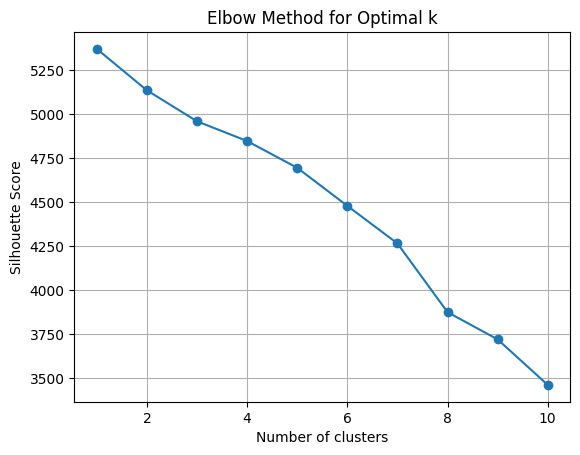

In [ ]:
# Create the elbow plot

X = scaled_full_data.drop(columns='cluster').select_dtypes(include='number')

scores = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(X)
    scores.append(km.inertia_)

plt.plot(range(1, 11), scores, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

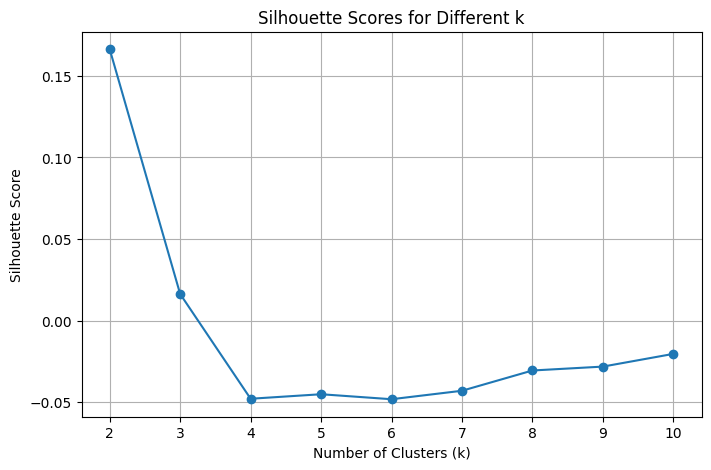

In [ ]:

# for stronger validation used silhouetter_score
# The silhouette score measures how well each point fits in its assigned cluster —
# balancing closeness within its cluster and distance from other clusters.
# The higher the score, the better your clusters are defined.

# sc = how close a point is to its own cluster versus how far it is 
# from the next closest cluster

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = scaled_full_data.drop(columns='cluster', errors='ignore').select_dtypes(include='number')

scores = []
K = range(2, 11) 

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
